In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

In [9]:
# 1. DATA PREP & SETUP
sns.set_theme(style="whitegrid", context="talk")

# color palette
country_palette = {
    'Austria': '#1f77b4',      # Blue
    'Estonia': '#ff7f0e',      # Orange
    'France': '#2ca02c',       # Green
    'Germany': '#d62728',      # Red
    'Poland': '#9467bd',       # Purple
    'Switzerland': '#8c564b'   # Brown
}

In [10]:
df = pd.read_csv('jan_2026_electricity_forecasts.csv')
df['date'] = pd.to_datetime(df['date'])
df['country'] = df['country'].str.capitalize()

df.head()


,date,y_pred,lower,upper,country
0,2026-01-01,91.203613,70.379901,112.027325,Austria
1,2026-01-02,96.790743,75.967031,117.614455,Austria
2,2026-01-03,98.339153,77.515441,119.162865,Austria
3,2026-01-04,100.577738,79.754026,121.401450,Austria
4,2026-01-05,101.866113,81.042401,122.689825,Austria


In [11]:
df['uncertainty_width'] = df['upper'] - df['lower']
df['day_str'] = df['date'].dt.strftime('%d')

df[['date','country','y_pred','lower','upper','uncertainty_width','day_str']].head()

,date,country,y_pred,lower,upper,uncertainty_width,day_str
0,2026-01-01,Austria,91.203613,70.379901,112.027325,41.647424,01
1,2026-01-02,Austria,96.790743,75.967031,117.614455,41.647424,02
2,2026-01-03,Austria,98.339153,77.515441,119.162865,41.647424,03
3,2026-01-04,Austria,100.577738,79.754026,121.401450,41.647424,04
4,2026-01-05,Austria,101.866113,81.042401,122.689825,41.647424,05


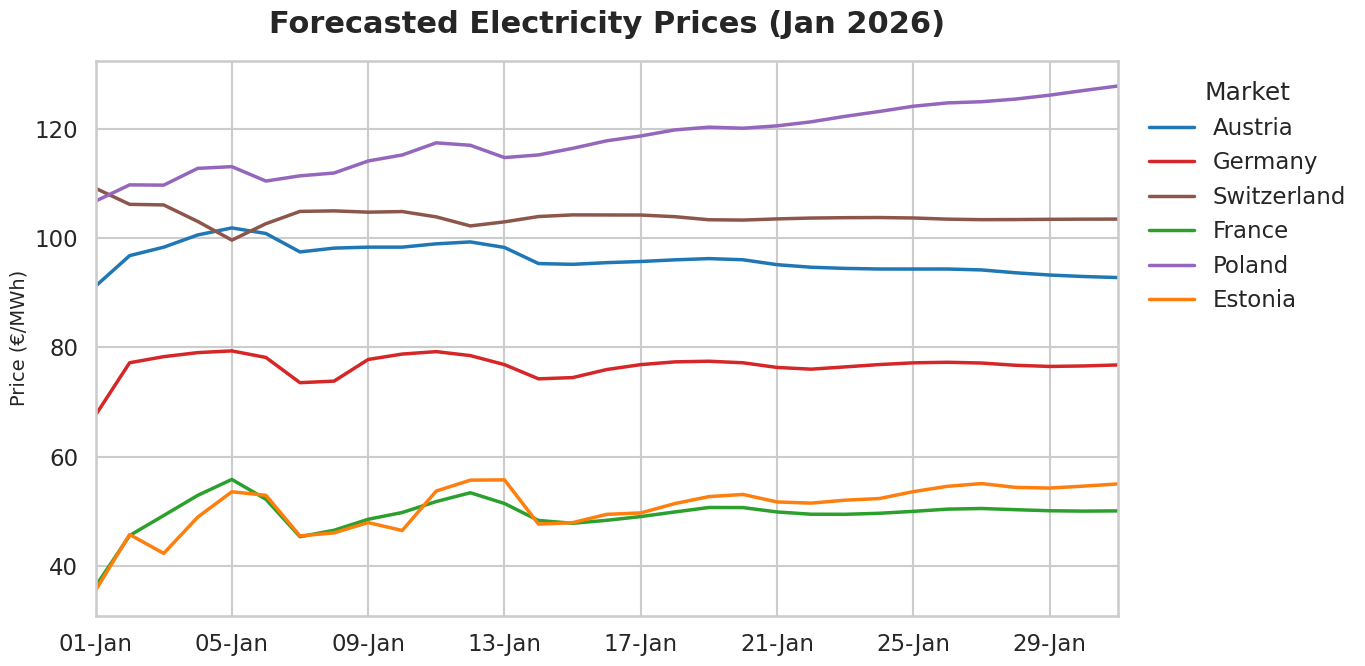

In [12]:
fig, ax = plt.subplots(figsize=(14, 7))

sns.lineplot(
    data=df,
    x='date',
    y='y_pred',
    hue='country',
    palette=country_palette,
    linewidth=2.5,
    ax=ax
)

ax.set_title('Forecasted Electricity Prices (Jan 2026)', fontsize=22, weight='bold', pad=20)
ax.set_ylabel('Price (€/MWh)', fontsize=14)
ax.set_xlabel('')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left', frameon=False, title='Market')
ax.margins(x=0)

plt.tight_layout()
plt.show()

/tmp/ipython-input-3478415846.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


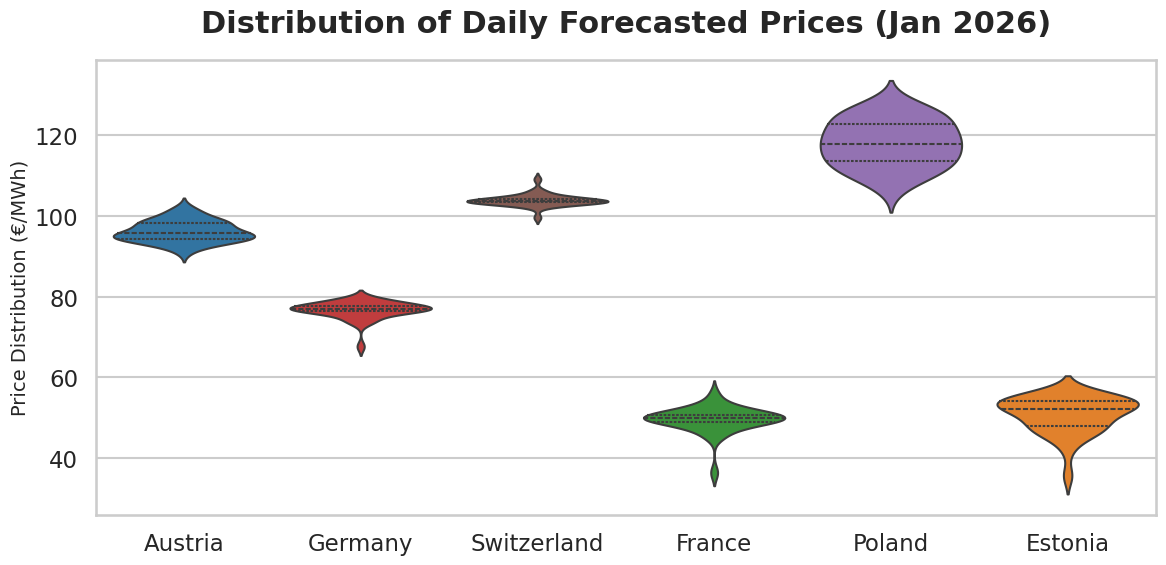

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.violinplot(
    data=df,
    x='country',
    y='y_pred',
    palette=country_palette,
    inner="quartile",
    linewidth=1.5,
    ax=ax
)

ax.set_title('Distribution of Daily Forecasted Prices (Jan 2026)', fontsize=22, weight='bold', pad=20)
ax.set_ylabel('Price Distribution (€/MWh)', fontsize=14)
ax.set_xlabel('')

plt.tight_layout()
plt.show()

In [14]:
price_matrix = df.pivot(index='country', columns='day_str', values='y_pred')
price_matrix.head()

day_str,01,02,03,04,05,06,07,08,09,10,...,22,23,24,25,26,27,28,29,30,31
country,,,,,,,,,,,,,,,,,,,,,
Austria,91.203613,96.790743,98.339153,100.577738,101.866113,100.840444,97.470868,98.168729,98.345653,98.346271,...,94.668651,94.458005,94.345938,94.338609,94.344756,94.176179,93.655242,93.243689,92.971189,92.779981
Estonia,35.524043,45.753572,42.297540,48.939806,53.577017,52.931986,45.500249,46.054962,47.941620,46.487485,...,51.501094,52.037915,52.334649,53.606853,54.576955,55.080467,54.380162,54.255825,54.612887,55.011913
France,36.269112,45.568470,49.233133,52.922175,55.835290,52.201450,45.352561,46.536758,48.543434,49.781249,...,49.466277,49.455015,49.640565,49.993138,50.400840,50.515996,50.299275,50.102107,50.035956,50.079551
Germany,67.602080,77.188121,78.305675,79.043769,79.358258,78.158479,73.539318,73.828357,77.784156,78.780318,...,76.014197,76.431079,76.857256,77.175488,77.278117,77.138035,76.726749,76.514321,76.603764,76.787343
Poland,106.765265,109.743245,109.694904,112.763791,113.077655,110.442495,111.396079,111.914620,114.111300,115.213662,...,121.277933,122.288519,123.173259,124.133324,124.741018,124.959295,125.443303,126.159738,127.017272,127.837231


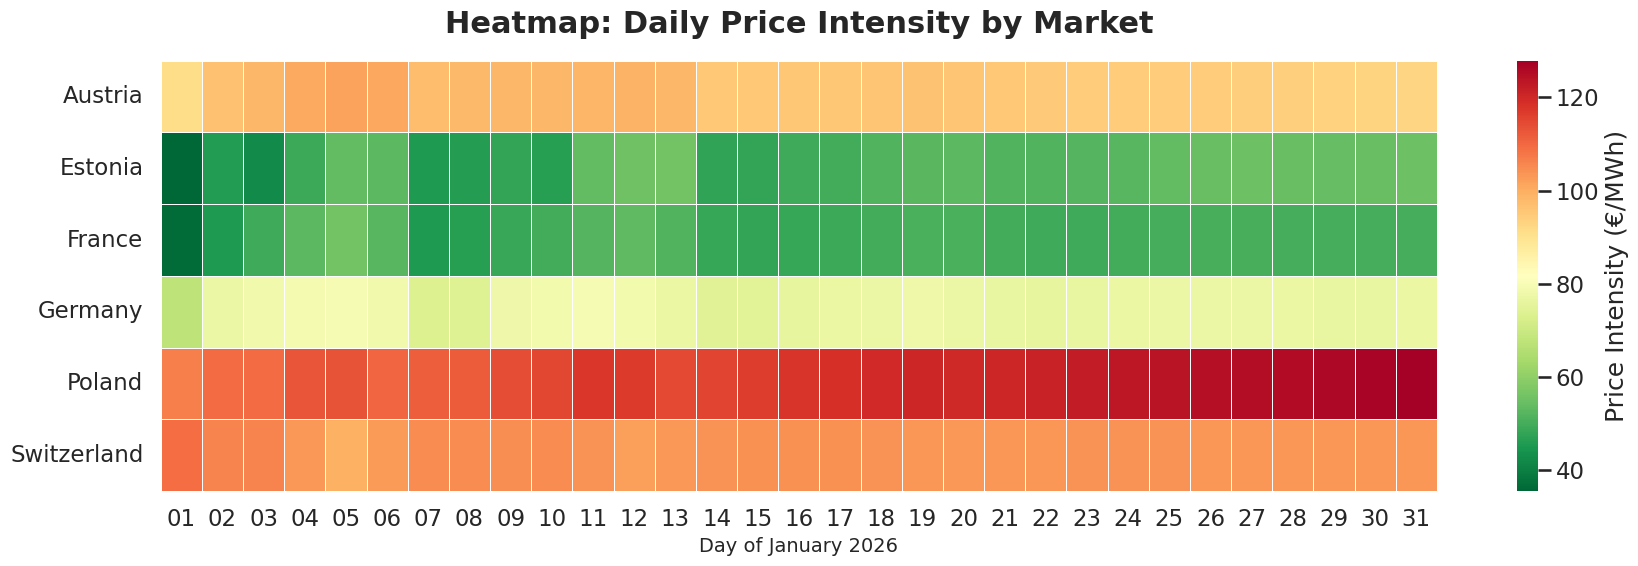

In [15]:
fig, ax = plt.subplots(figsize=(18, 6))

sns.heatmap(
    price_matrix,
    cmap="RdYlGn_r",
    linewidths=.5,
    annot=False,
    cbar_kws={'label': 'Price Intensity (€/MWh)'},
    ax=ax
)

ax.set_title('Heatmap: Daily Price Intensity by Market', fontsize=22, weight='bold', pad=20)
ax.set_xlabel('Day of January 2026', fontsize=14)
ax.set_ylabel('')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [16]:
risk_df = df.groupby('country')[['y_pred', 'upper']].mean().reset_index()
risk_df = risk_df.sort_values('y_pred')
risk_df

,country,y_pred,upper
2,France,49.469082,72.155995
1,Estonia,50.684938,90.794492
3,Germany,76.629968,104.110823
0,Austria,96.216000,117.039712
5,Switzerland,103.918742,121.447991
4,Poland,118.071561,142.184508


/tmp/ipython-input-2286701593.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


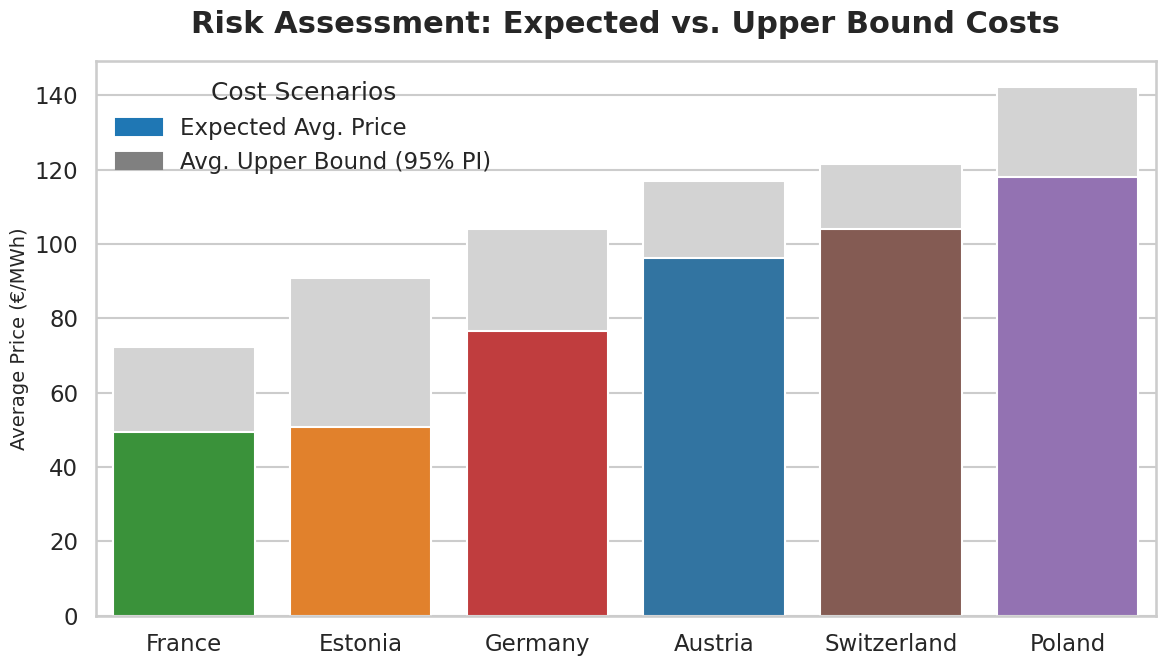

In [17]:
fig, ax = plt.subplots(figsize=(12, 7))

sns.barplot(
    data=risk_df, x='country', y='upper',
    color='lightgrey', ax=ax
)

sns.barplot(
    data=risk_df, x='country', y='y_pred',
    palette=country_palette, ax=ax
)

expected_patch = mpatches.Patch(color='gray', label='Avg. Upper Bound (95% PI)')
risk_patch = mpatches.Patch(color='#1f77b4', label='Expected Avg. Price')  # blue as generic palette rep
ax.legend(handles=[risk_patch, expected_patch], loc='upper left', frameon=False, title="Cost Scenarios")

ax.set_title('Risk Assessment: Expected vs. Upper Bound Costs', fontsize=22, weight='bold', pad=20)
ax.set_ylabel('Average Price (€/MWh)', fontsize=14)
ax.set_xlabel('')

plt.tight_layout()
plt.show()

In [18]:
summary = df.groupby('country').agg({
    'y_pred': 'mean',
    'uncertainty_width': 'mean'
}).reset_index()

summary

,country,y_pred,uncertainty_width
0,Austria,96.216000,41.647424
1,Estonia,50.684938,80.219108
2,France,49.469082,45.373827
3,Germany,76.629968,54.961712
4,Poland,118.071561,48.225894
5,Switzerland,103.918742,35.058498


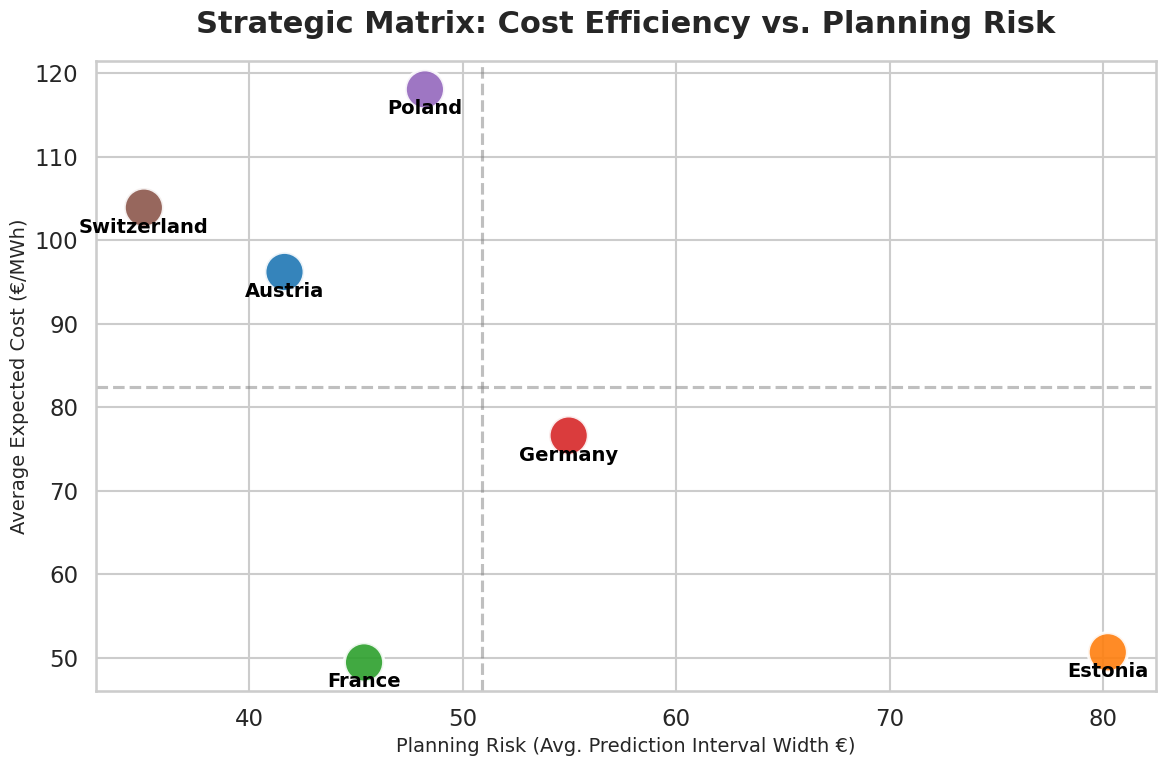

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(
    data=summary,
    x='uncertainty_width',
    y='y_pred',
    hue='country',
    s=800,
    palette=country_palette,
    legend=False,
    alpha=0.9,
    ax=ax
)

# Quadrants
ax.axvline(x=summary['uncertainty_width'].mean(), color='grey', linestyle='--', alpha=0.5)
ax.axhline(y=summary['y_pred'].mean(), color='grey', linestyle='--', alpha=0.5)

# Text Labels
for i in range(summary.shape[0]):
    row = summary.iloc[i]
    ax.text(
        row.uncertainty_width,
        row.y_pred - 3,
        row.country,
        horizontalalignment='center',
        size=14,
        weight='bold',
        color='black'
    )

ax.set_title('Strategic Matrix: Cost Efficiency vs. Planning Risk', fontsize=22, weight='bold', pad=20)
ax.set_xlabel('Planning Risk (Avg. Prediction Interval Width €)', fontsize=14)
ax.set_ylabel('Average Expected Cost (€/MWh)', fontsize=14)

plt.tight_layout()
plt.show()

In [20]:
df_sorted = df.sort_values(by=['country', 'date'])

# Calculation: Price (€/MWh) * 1 MW * 24 Hours
df_sorted['cumulative_cost'] = (df_sorted.groupby('country')['y_pred'].cumsum() * 24)

df_sorted[['date','country','y_pred','cumulative_cost']].head()

,date,country,y_pred,cumulative_cost
0,2026-01-01,Austria,91.203613,2188.886715
1,2026-01-02,Austria,96.790743,4511.864557
2,2026-01-03,Austria,98.339153,6872.004234
3,2026-01-04,Austria,100.577738,9285.869941
4,2026-01-05,Austria,101.866113,11730.656648


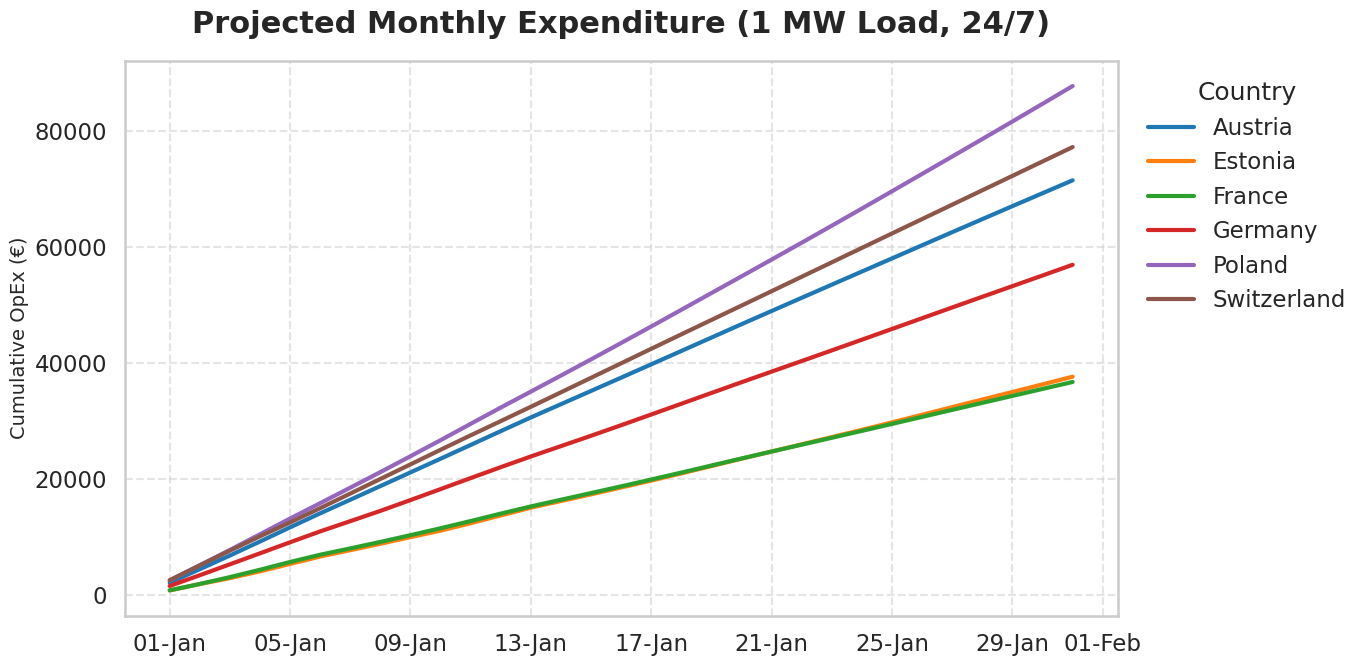

In [21]:
fig, ax = plt.subplots(figsize=(14, 7))

sns.lineplot(
    data=df_sorted,
    x='date',
    y='cumulative_cost',
    hue='country',
    palette=country_palette,
    linewidth=3,
    ax=ax
)

ax.set_title('Projected Monthly Expenditure (1 MW Load, 24/7)', fontsize=22, weight='bold', pad=20)
ax.set_ylabel('Cumulative OpEx (€)', fontsize=14)
ax.set_xlabel('')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left', frameon=False, title='Country')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()